In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df= pd.read_csv("./input/house.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(21613, 21)

In [72]:
df.size

453873

In [73]:
df.index

RangeIndex(start=0, stop=21613, step=1)

In [74]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [75]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

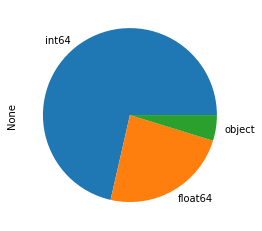

In [76]:
df.dtypes.value_counts().plot.pie()
plt.show()

In [77]:
df.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [78]:
df.values

array([[7129300520, '20141013T000000', 221900.0, ..., -122.257, 1340,
        5650],
       [6414100192, '20141209T000000', 538000.0, ..., -122.319, 1690,
        7639],
       [5631500400, '20150225T000000', 180000.0, ...,
        -122.23299999999999, 2720, 8062],
       ...,
       [1523300141, '20140623T000000', 402101.0, ...,
        -122.29899999999999, 1020, 2007],
       [291310100, '20150116T000000', 400000.0, ..., -122.069, 1410,
        1287],
       [1523300157, '20141015T000000', 325000.0, ...,
        -122.29899999999999, 1020, 1357]], dtype=object)

In [79]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [81]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [83]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [84]:
space=df["sqft_living"]
price=df["price"]
space

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21608    1530
21609    2310
21610    1020
21611    1600
21612    1020
Name: sqft_living, Length: 21613, dtype: int64

In [85]:
x=np.array(space).reshape(-1, 1)
y=np.array(price).reshape(-1, 1)

In [86]:
x.shape

(21613, 1)

In [87]:
print(x)

[[1180]
 [2570]
 [ 770]
 ...
 [1020]
 [1600]
 [1020]]


In [88]:
y.shape

(21613, 1)

In [89]:
print(y)

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


In [90]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=1/3,random_state=0)

In [91]:
print(xtrain)

[[1260]
 [1320]
 [ 920]
 ...
 [2360]
 [2370]
 [2380]]


In [92]:
print(ytrain)

[[465750.]
 [575000.]
 [212500.]
 ...
 [431000.]
 [411000.]
 [699900.]]


In [93]:
print(xtest)

[[1430]
 [4670]
 [1440]
 ...
 [1870]
 [1160]
 [1040]]


In [94]:
xtest.shape

(7205, 1)

In [95]:
print(ytest)

[[ 297000.]
 [1578000.]
 [ 562100.]
 ...
 [ 592500.]
 [ 284900.]
 [ 380000.]]


In [96]:
ytest.shape

(7205, 1)

In [97]:
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [98]:
predict_tr=regressor.predict(xtrain)

Text(0, 0.5, 'ylabel=price')

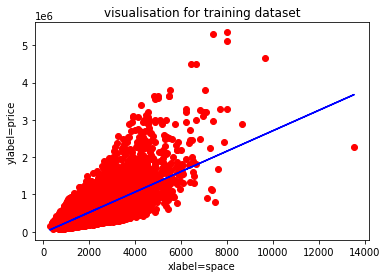

In [99]:
plt.scatter(xtrain,ytrain,color="r")
plt.plot(xtrain,predict_tr,color="b")
plt.title("visualisation for training dataset")
plt.xlabel("xlabel=space")
plt.ylabel("ylabel=price")


In [100]:
predict_ts=regressor.predict(xtest)

Text(0, 0.5, 'ylabel=price')

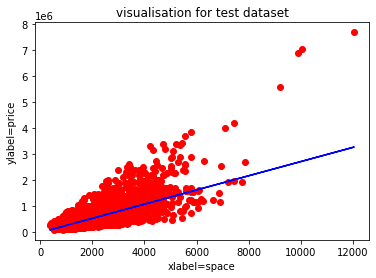

In [101]:
plt.scatter(xtest,ytest,color="r")
plt.plot(xtest,predict_ts,color="b")

plt.title("visualisation for test dataset")
plt.xlabel("xlabel=space")
plt.ylabel("ylabel=price")

In [102]:
print(regressor.predict([[1190]]))
print(regressor.predict([[3550]]))
print(regressor.predict([[2050]]))





[[296784.47258884]]
[[942956.76287626]]
[[532254.03599866]]


# 2emephase

In [103]:
#features are
fet=[ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long']
x_fet=df[fet]
y_tar=df['price']

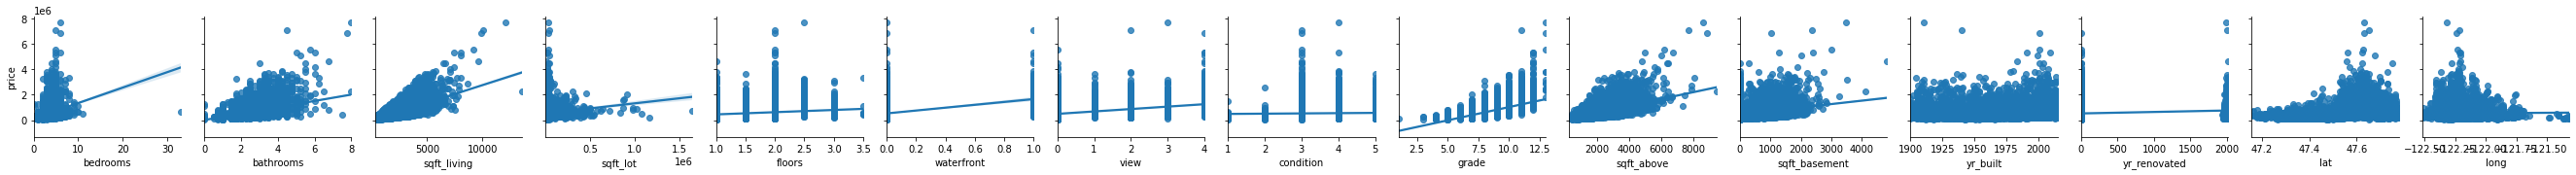

In [104]:
sns.pairplot(df,y_vars="price",x_vars=fet,kind = 'reg',palette='spring')

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(x_fet, y_tar, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(15129, 15)
(6484, 15)
(15129,)
(6484,)


In [106]:
#training the model by using LinearRegression
clf=LinearRegression()
clf.fit(X_train,Y_train)
accuracy=clf.score(X_test,Y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))


'Accuracy: 70%'

In [107]:
#using Ridge classifier
from sklearn.linear_model import Ridge as rd
clf1=rd(alpha=0.01)
clf1.fit(X_train,Y_train)
accuracy1=clf1.score(X_test,Y_test)
"Accuracy1: {}%".format(int(round(accuracy1 * 100)))

'Accuracy1: 70%'

In [108]:
#using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
clf2=RandomForestRegressor()
clf2.fit(X_train,Y_train)
accuracy2=clf2.score(X_test,Y_test)
"Accuracy2: {}%".format(int(round(accuracy2 * 100)))

'Accuracy2: 88%'

In [109]:
#using ElasticNet
from sklearn.linear_model import ElasticNet
clf3=ElasticNet()
clf3.fit(X_train,Y_train)
accuracy3=clf3.score(X_test,Y_test)
"Accuracy3: {}%".format(int(round(accuracy3 * 100)))

'Accuracy3: 62%'

In [110]:
#using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
clf4=DecisionTreeRegressor()
clf4.fit(X_train,Y_train)
accuracy4=clf4.score(X_test,Y_test)
"Accuracy4: {}%".format(int(round(accuracy4 * 100)))

'Accuracy4: 74%'

In [111]:
#using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
clf5=KNeighborsRegressor()
clf5.fit(X_train,Y_train)
accuracy5=clf5.score(X_test,Y_test)
"Accuracy5: {}%".format(int(round(accuracy5 * 100)))

'Accuracy5: 52%'

In [112]:
#using GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
clf6=GradientBoostingRegressor()
clf6.fit(X_train,Y_train)
accuracy6=clf6.score(X_test,Y_test)
"Accuracy6: {}%".format(int(round(accuracy6 * 100)))

'Accuracy6: 86%'